## Discover

- covid presents us with new challenges
- we need to be able to adapt to the ever changing conditions that we are presented with
- to do so, we need to be able to know when is the ideal time to start our ideas and seize the opportunities in this uncertain time (model uncertain timings hehhehe)

## Define

1. Singapore, where we are the most familiar with.
2. When are we able to open up our economy given our government's stance, number of cases, vaccination rates
3. When are we able to flatten the curve

## Develop

1. To do so, we can come up with a simple linear regression model to calculate when the curve will flatten given a huge rise in daily number of cases
2. This will allow opportunity seekers to have a good idea of when Singapore is able to flatten the curve and resume normal life

## Deliver

1. ???

#### Given a rise in cases, the Singaporean Government would always take the necessary precautions to prevent an unpreceeded rise in COVID-19 transmission. This increases the Stringency Index significantly as workplaces, schools and other public facilities close. In such a case, how long would the 'lockdown' last? To find out, we can look into our past experiences to deter

### Start with importing Data that outlines Singapore's Covid-19 response


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# data here is filled with growth trendline analysis using excel and 0's where places are obvious
df = pd.read_csv("Singapore_Covid_Data_csv.csv")
display(df)

,location,date,new_cases_smoothed_per_million,total_cases_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed_per_thousand,positive_rate,people_fully_vaccinated_per_hundred,stringency_index
0,Singapore,1/3/2020,0.445,0.183,0.000,0.56,0.000,0.000,0.000,30.56
1,Singapore,2/3/2020,0.498,0.550,0.000,0.54,0.000,0.000,0.000,30.56
2,Singapore,3/3/2020,0.498,0.550,0.000,0.53,0.000,0.000,0.000,30.56
3,Singapore,4/3/2020,0.445,0.733,0.000,0.57,0.000,0.000,0.000,30.56
4,Singapore,5/3/2020,0.629,0.917,0.000,0.73,0.000,0.000,0.000,30.56
...,...,...,...,...,...,...,...,...,...,...
609,Singapore,31/10/2021,673.998,15193.634,0.288,0.97,4.130,0.163,86.405,44.44
610,Singapore,1/11/2021,655.556,15496.186,0.367,0.94,4.130,0.159,86.445,44.44
611,Singapore,2/11/2021,661.293,15760.782,0.419,0.92,3.976,0.166,86.485,44.44
612,Singapore,3/11/2021,617.050,16116.327,0.472,0.90,3.822,0.161,86.525,44.44


#### Determine relationship between features and stringency index

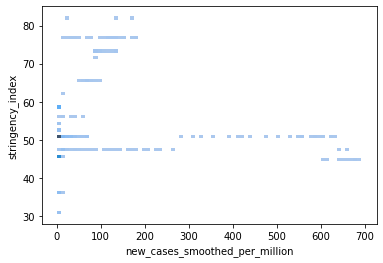

In [2]:
new_cases_vs_stringency_index = sns.histplot(x="new_cases_smoothed_per_million", y= "stringency_index", data=df)

In [3]:
## do using skilearn to see if the model works
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def get_features_targets(df, feature_names, target_names):
    # get df of selected features
    df_feature = df[feature_names]
    # get df of selected targets
    df_target = df[target_names]
    return df_feature, df_target

def normalize_z(df):
    return ((df - df.mean(axis=0))/df.std(axis=0))

In [4]:
# Read the housing_processed.csv file
df = pd.read_csv("Singapore_Covid_Data_csv.csv")

# extract the features from ["RM", "DIS", "INDUS"] and target from []"MEDV"]
df_features, df_target = get_features_targets(df.loc[46:,:],["new_cases_smoothed_per_million","total_cases_per_million","new_deaths_smoothed_per_million", "reproduction_rate", "new_tests_smoothed_per_thousand","people_fully_vaccinated_per_hundred","positive_rate"],["stringency_index"])
# normalize
df_features = normalize_z(df_features)


In [5]:
# Split the data into training and test data set using scikit-learn function
df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(df_features, df_target, random_state=100, test_size=0.3)

# Instantiate LinearRegression() object
model = LinearRegression()
model.fit(df_features_train, df_target_train)

LinearRegression()

In [6]:
# predict stringency index using test features
pred = model.predict(df_features_test)

In [7]:
r2 = r2_score(df_target_test, pred)
print(r2)

0.8646154507634594


In [8]:
mse = mean_squared_error(df_target_test, pred)
print(mse)


10.265336181946843


## Start of manual ML coding

In [43]:
def normalize_z(df):
    return ((df - df.mean(axis=0))/df.std(axis=0))

def get_features_targets(df, feature_names, target_names):
    # get df of selected features
    df_feature = df[feature_names]
    # get df of selected targets
    df_target = df[target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    # number of columns in the dataframe
    cols = len(df_feature.columns)
    # convert df to numpy
    feature = df_feature.to_numpy().reshape(-1,cols)
    array = np.concatenate((np.ones((feature.shape[0],1)), feature), axis = 1)
    print(array.shape,"array shape of prepared feature")
    return array

def prepare_target(df_target):
    cols = len(df_target.columns)
    target = df_target.to_numpy().reshape(-1,cols)
    return target

def predict(df_feature, beta):
    df_feature = normalize_z(df_feature)
    preped_feature = prepare_feature(df_feature)
    return predict_norm(preped_feature, beta)

def predict_norm(X, beta):
    return np.matmul(X,beta)

def split_data(df_feature, df_target, random_state=100, test_size=0.3):
    ###BEGIN SOLUTION
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    k = int(test_size * len(indexes))
    test_index = np.random.choice(indexes, k, replace=False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    # the above indexes just helps you to get random indexes within the entire data
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    ss_res = np.sum((y-ypred)**2)
    y_mean = np.mean(y)
    ss_tot = np.sum((y-y_mean)**2)
    r_2 = (1-(ss_res/ss_tot))
    return r_2

def mean_squared_error(target, pred):
    num_data = target.shape[0]
    return (1/num_data)*(np.sum((target-pred)**2))

In [100]:
# Read the CSV file
df = pd.read_csv("Singapore_Covid_Data_csv.csv")

# Extract the features and the targets
df_features, df_target = get_features_targets(df.loc[46:,:],["new_cases_smoothed_per_million","total_cases_per_million","new_deaths_smoothed_per_million", "reproduction_rate", "new_tests_smoothed_per_thousand","people_fully_vaccinated_per_hundred","positive_rate"],["stringency_index"])

# Normalize using z normalization
df_features = normalize_z(df_features)

In [101]:
def compute_cost(X, y, beta): #beta is weighted values, in this case it is just choosen from random values
    J = 0
    number_of_samples = X.shape[0]
    error = np.matmul(X, beta) - y # before squaring
    error_sq = np.matmul(error.T, error)
    J = (1)/(2*number_of_samples) * error_sq # J here is a numpy array 
    ### END SOLUTION
    J = J[0][0]
    return J

In [102]:
def gradient_descent(X, y, beta, alpha, num_iters):
    number_of_samples = X.shape[0]
    print(X.shape,"numsam")
    J_storage = []
    for i in range(num_iters):
        # STEP 2: compute the derivate with current parameters
        derivative_error = (1/(number_of_samples)) * np.matmul(X.T, (np.matmul(X, beta) - y))
        # STEP 3: update the parameters
        beta = beta - alpha *  derivative_error
        # compute cost at every iteration of beta
        J_storage.append(compute_cost(X, y, beta))
    return beta, J_storage

In [107]:
X = prepare_feature(df_features)
target = prepare_target(df_target)
alpha = 0.01
iterations = 5500
beta = np.ones((8, 1))

beta, J_storage = gradient_descent(X, target, beta ,alpha, iterations)

# Extract the feature and the target
df_features_original, df_target = get_features_targets(df.loc[46:,:],["new_cases_smoothed_per_million","total_cases_per_million","new_deaths_smoothed_per_million", "reproduction_rate", "new_tests_smoothed_per_thousand","people_fully_vaccinated_per_hundred","positive_rate"],["stringency_index"])

# Call predict()
pred = predict(df_features_original, beta)
# Change target to numpy array
target = np.array(df_target)

(568, 8) array shape of prepared feature
(568, 8) numsam
(568, 8) array shape of prepared feature


In [112]:
# Extract the features and the target
df_features_original_train, df_target = get_features_targets(df.loc[46:,:],["new_cases_smoothed_per_million","total_cases_per_million","new_deaths_smoothed_per_million", "reproduction_rate", "new_tests_smoothed_per_thousand","people_fully_vaccinated_per_hundred","positive_rate"],["stringency_index"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features_original_train,df_target,100,0.3)

# Normalize the features using z normalization
df_features_train_z = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

beta = np.ones((8,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict() method
pred = predict(df_features_test,beta)

(398, 8) array shape of prepared feature
(398, 8) numsam
(170, 8) array shape of prepared feature


In [114]:
# change target test set to a numpy array
target = prepare_target(df_target_test)
display(target)

# Calculate r2 score by calling a function
r2 = r2_score(target, pred)
print(r2)

array([[50.93],
       [50.93],
       [50.93],
       [47.22],
       [47.22],
       [47.22],
       [47.22],
       [47.22],
       [47.22],
       [47.22],
       [47.22],
       [47.22],
       [47.22],
       [47.22],
       [47.22],
       [76.85],
       [47.22],
       [76.85],
       [47.22],
       [47.22],
       [76.85],
       [76.85],
       [47.22],
       [47.22],
       [82.41],
       [50.93],
       [50.93],
       [76.85],
       [50.93],
       [76.85],
       [76.85],
       [50.93],
       [50.93],
       [50.93],
       [76.85],
       [73.15],
       [76.85],
       [73.15],
       [50.93],
       [73.15],
       [50.93],
       [73.15],
       [50.93],
       [73.15],
       [50.93],
       [73.15],
       [50.93],
       [73.15],
       [44.44],
       [65.74],
       [44.44],
       [65.74],
       [44.44],
       [65.74],
       [65.74],
       [65.74],
       [65.74],
       [50.93],
       [50.93],
       [50.93],
       [50.93],
       [50.93],
       [

0.85085930974259


In [115]:
# Calculate the mse
mse = mean_squared_error(target, pred)

###
### YOUR CODE HERE
###
print(mse)

11.371266401850093
